In [1]:
import pandas as pd
import numpy as np
import csv
import random as rd

In [2]:
movies_columns =['MovieIDs','MovieName','Category']
df_movie=pd.read_csv('dataset/movies.dat', sep = '::', engine='python', encoding = 'latin-1', names=movies_columns)
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating_columns =['ID','MovieID','Ratings','TimeStamp']
df_rating=pd.read_csv('dataset/ratings.dat', sep = '::', engine='python', encoding = 'latin-1', names=rating_columns)
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users_columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user=pd.read_csv('dataset/users.dat', sep = '::', engine='python', encoding = 'latin-1', names=users_columns)
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3883 non-null     float64
 1   MovieName   3883 non-null     object 
 2   Category    3883 non-null     object 
 3   ID          1000209 non-null  int64  
 4   MovieID     1000209 non-null  int64  
 5   Ratings     1000209 non-null  int64  
 6   TimeStamp   1000209 non-null  int64  
 7   UserID      6040 non-null     float64
 8   Gender      6040 non-null     object 
 9   Age         6040 non-null     float64
 10  Occupation  6040 non-null     float64
 11  Zip-code    6040 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 99.2+ MB


In [7]:
df.describe(include="all")

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
count,3883.000000,3883,3883,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,3883,301,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3439
top,NaN,Toy Story (1995),Drama,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,48104
freq,NaN,1,843,NaN,NaN,NaN,NaN,NaN,4331,NaN,NaN,19
mean,1986.049446,NaN,NaN,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,3020.500000,NaN,30.639238,8.146854,NaN
std,1146.778349,NaN,NaN,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000,NaN,1.000000,0.000000,NaN
25%,982.500000,NaN,NaN,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1510.750000,NaN,25.000000,3.000000,NaN
50%,2010.000000,NaN,NaN,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3020.500000,NaN,25.000000,7.000000,NaN
75%,2980.500000,NaN,NaN,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.250000,NaN,35.000000,14.000000,NaN


In [8]:
df.isna().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

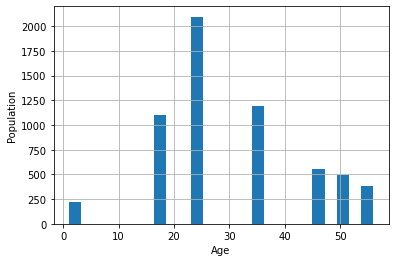

In [10]:
import matplotlib.pyplot as plt
df_user['Age'].hist(bins=25)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()


<AxesSubplot:xlabel='Viewership Count', ylabel='MovieName'>

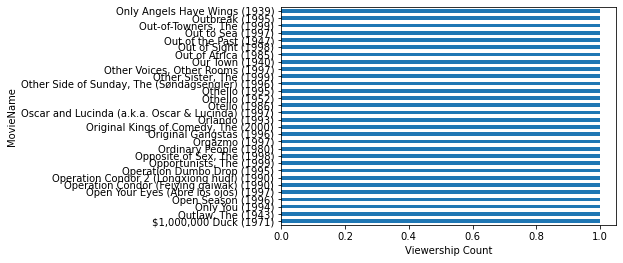

In [11]:
res = df.groupby("MovieName").size().sort_values(ascending=False)[:30]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")

In [12]:
df['Ratings'].unique()


array([5, 3, 4, 2, 1], dtype=int64)

In [13]:
df_new = df['Category'].str.get_dummies(sep='|')
df_new.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_new = pd.concat((df_new,df['Ratings']),axis=1)
df_new.head()


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Ratings
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [15]:
df_new = pd.concat((df_new,df['Gender']),axis = 1)
df_new = pd.concat((df_new,df['Age']),axis = 1)
df_new.head()


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Ratings,Gender,Age
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5,F,1.0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,M,56.0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,3,M,25.0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,4,M,45.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5,M,25.0


In [16]:
df_new = df_new.loc[:,~df_new.columns.duplicated()]
df_new

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Ratings,Gender,Age
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5,F,1.0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,M,56.0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,3,M,25.0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,4,M,45.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5,M,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,M,25.0
3879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,M,25.0
3880,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,3,M,18.0
3881,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,5,M,56.0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [18]:
X = df_new.drop(["Ratings","Age","Gender"],axis=1)
y = df_new["Ratings"]


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=43)


In [20]:
model_lr=LinearRegression()


In [21]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(mse_lr)
print(rmse_lr)


1.2375367458467765
1.1124462889716413


In [23]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

In [24]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(mse_dt)
print(rmse_dt)

1.3535119604348076
1.163405329382158


In [26]:
print(f"The MSE of Linear Regression model is: {mse_lr:.2f}, and its RMSE is {rmse_lr:.2f} \nThe MSE of Decision Tree model is: {mse_dt:.2f}, and its RMSE is {rmse_dt:.2f}")

The MSE of Linear Regression model is: 1.24, and its RMSE is 1.11 
The MSE of Decision Tree model is: 1.35, and its RMSE is 1.16
